---


The task is to create a **Financial Credit Worthiness Model**.

The dataset is the **credit_customers.csv** file. (https://disk.yandex.ru/d/zyXWN2xc5WZKLg)

There are columns inside such as **checking_status**, **duration**, **credit_history**, **credit_amount**, **savings_status**, **employment**, etc.

Dmitrii Muras, student of the Ural Federal University, Yekaterinburg, Russia, 2023.


---


First of all, I have opened the dataset file in Visual Studio Code and used the CSV editor to have a quick look at the data.


The screenshot below shows us the data in a much better way.

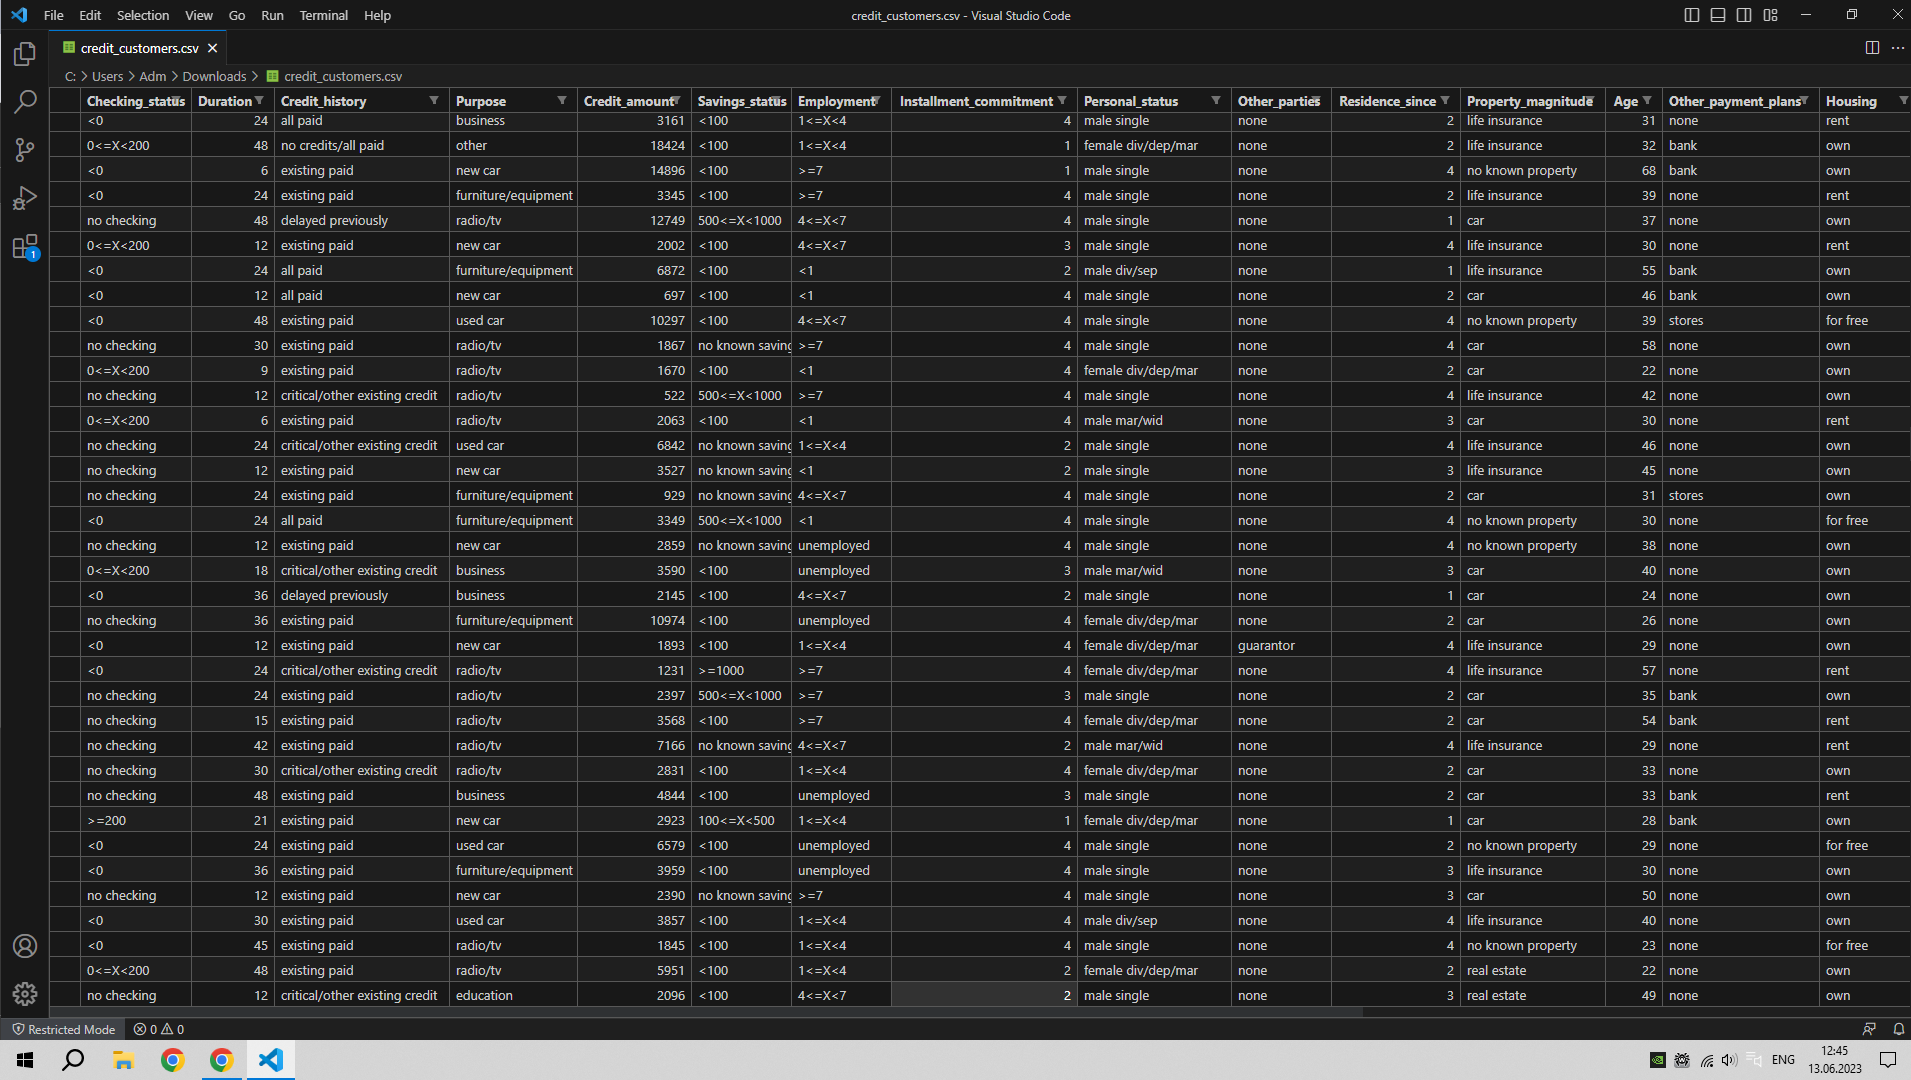

Importing Python libraries.

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing CSV file with data.

In [358]:
df = pd.read_csv('/content/credit_customers.csv')

In [359]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [360]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Once we've loaded our dataset, we can create some plots to see the interesting and useful information about our clients and what they will use the potential credit for.

It is interesting to note that the majority of credit cilents are people between the ages of 22 and 36.

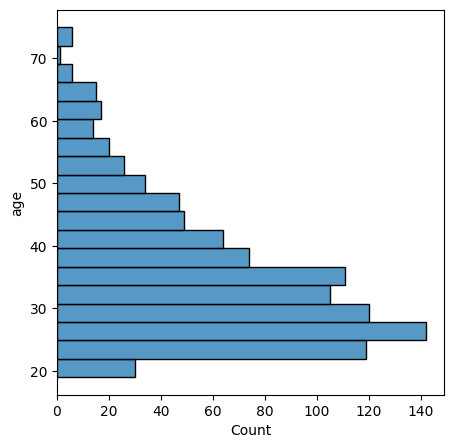

In [361]:
plt.figure(figsize=(5, 5))
sns.histplot(
    y='age',
    data=df,
)
plt.show()

Half of the clients have already existing paid. There are lots of people with critical situation or other existing credit. And in the end there are two smallest groups of people who have all paid or no credit.

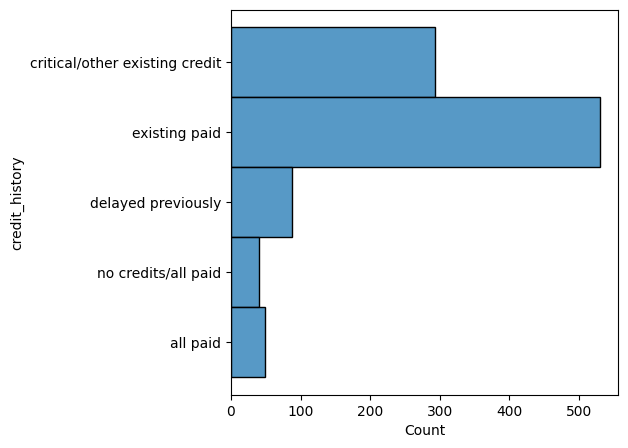

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(
    y='credit_history',
    data=df,
)
plt.show()

The majority of clients will use their loan for radio/TV, a new car or furniture/equipment. Surprisingly, only about 50 clients will use the credit for education.

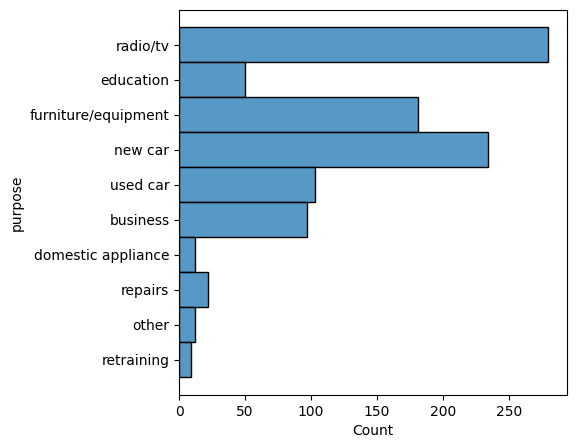

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(
    y='purpose',
    data=df,
)
plt.show()

The majority of people have <100 savings.

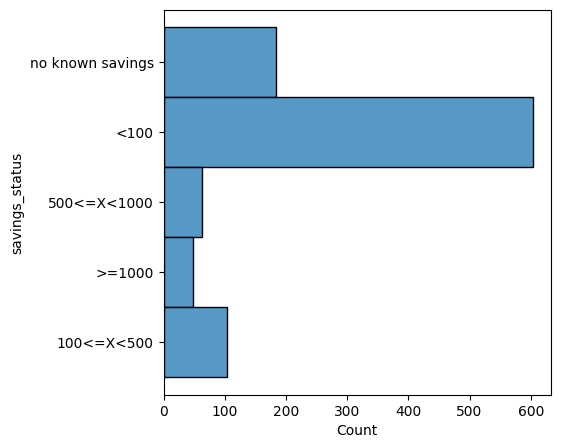

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(
    y='savings_status',
    data=df,
)
plt.show()

The majority of credits will possibly have a duration up to 12-22.

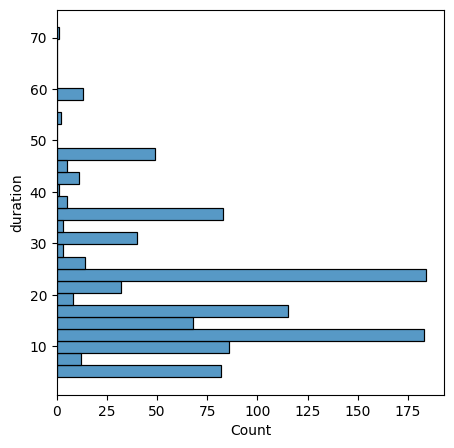

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(
    y='duration',
    data=df,
)
plt.show()

I have tried to look at the relationship between the client's job and the amount of credit they want to take out. Definitely, those clients who are skilled at work or have a high qualification will get a positive decision. There are very few people who might get it.

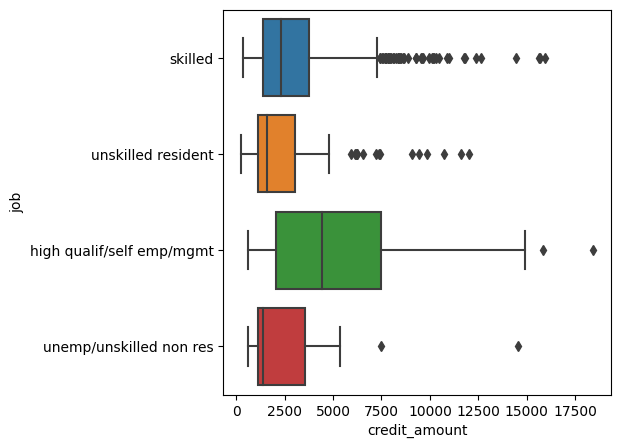

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(
    y='job',
    x='credit_amount',
    data=df,
)
plt.show()

After looking at the dataset and the graphs, we'll work with the data.

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

We need to distinguish between numerical and categorical variables because this will be used in our work in the future analysis.

In [363]:
numeric = df.columns
number_numeric = df._get_numeric_data().columns

There is a list of all 7 numeric variables used in the dataset.

In [364]:
list(number_numeric)

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

There is a list of all 14 categorical variables used in the dataset.

In [337]:
number_categorical = list(set(numeric) - set(number_numeric))
list(number_categorical)

['purpose',
 'credit_history',
 'foreign_worker',
 'own_telephone',
 'personal_status',
 'savings_status',
 'employment',
 'other_payment_plans',
 'checking_status',
 'class',
 'housing',
 'other_parties',
 'property_magnitude',
 'job']

In [365]:
df['credit_history'] = df['credit_history'].map({'critical/other existing credit':0, 'existing paid':1,'delayed previously':2, 'no credits/all paid':3, 'all paid':4}).astype(int)
df['class'] = df['class'].map({'good':1, 'bad':0}).astype(int)
df['housing'] = df['housing'].map({'own':1,'for free':0,'rent':2}).astype(int)
df['checking_status'] = df['checking_status'].map({'<0':0, '0<=X<200':1, 'no checking':2, '>=200':3}).astype(int)
df['personal_status'] = df['personal_status'].map({'male single':0, 'female div/dep/mar':1, 'male div/sep':2, 'male mar/wid':3}).astype(int)
df['savings_status'] = df['savings_status'].map({'no known savings':0, '<100':1, '500<=X<1000':2, '>=1000':3,'100<=X<500':4}).astype(int)
df['own_telephone'] = df['own_telephone'].map({'none': 0, 'yes': 1}).astype(int)
df['foreign_worker'] = df['foreign_worker'].map({'no': 0, 'yes': 1}).astype(int)
df['purpose'] = df['purpose'].map({'radio/tv':0,'education':1,'furniture/equipment':2,'new car':3,'used car':4,'business':3, 'domestic appliance':4, 'repairs':5, 'other':6, 'retraining':7}).astype(int)
df['property_magnitude'] = df['property_magnitude'].map({'real estate':1,'no known property':0,'life insurance':2,'car':3}).astype(int)
df['employment'] = df['employment'].map({'>=7':1, '1<=X<4':2, '4<=X<7':3,'unemployed':0, '<1':4}).astype(int)
df['other_payment_plans'] = df['other_payment_plans'].map({'none':0,'bank':1,'stores':2}).astype(int)
df['other_parties'] = df['other_parties'].map({'guarantor':1,'none':0,'co applicant':2}).astype(int)
df['job'] = df['job'].map({'skilled':1,'unskilled resident':0,'high qualif/self emp/mgmt':2,'unemp/unskilled non res':3}).astype(int)

In [366]:
df['duration'] = df['duration'].astype(int)
df['credit_amount'] = df['credit_amount'].astype(int)
df['installment_commitment'] = df['installment_commitment'].astype(int)
df['residence_since'] = df['residence_since'].astype(int)
df['age'] = df['age'].astype(int)
df['existing_credits'] = df['existing_credits'].astype(int)
df['num_dependents'] = df['num_dependents'].astype(int)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   checking_status         1000 non-null   int64
 1   duration                1000 non-null   int64
 2   credit_history          1000 non-null   int64
 3   purpose                 1000 non-null   int64
 4   credit_amount           1000 non-null   int64
 5   savings_status          1000 non-null   int64
 6   employment              1000 non-null   int64
 7   installment_commitment  1000 non-null   int64
 8   personal_status         1000 non-null   int64
 9   other_parties           1000 non-null   int64
 10  residence_since         1000 non-null   int64
 11  property_magnitude      1000 non-null   int64
 12  age                     1000 non-null   int64
 13  other_payment_plans     1000 non-null   int64
 14  housing                 1000 non-null   int64
 15  existing_credits      

In [368]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,6,0,0,1169,0,1,4,0,0,...,1,67,0,1,2,1,1,1,1,1
1,1,48,1,0,5951,1,2,2,1,0,...,1,22,0,1,1,1,1,0,1,0
2,2,12,0,1,2096,1,3,2,0,0,...,1,49,0,1,1,0,2,0,1,1
3,0,42,1,2,7882,1,3,2,0,1,...,2,45,0,0,1,1,2,0,1,1
4,0,24,2,3,4870,1,2,3,0,0,...,0,53,0,0,2,1,2,0,1,0


<Axes: >

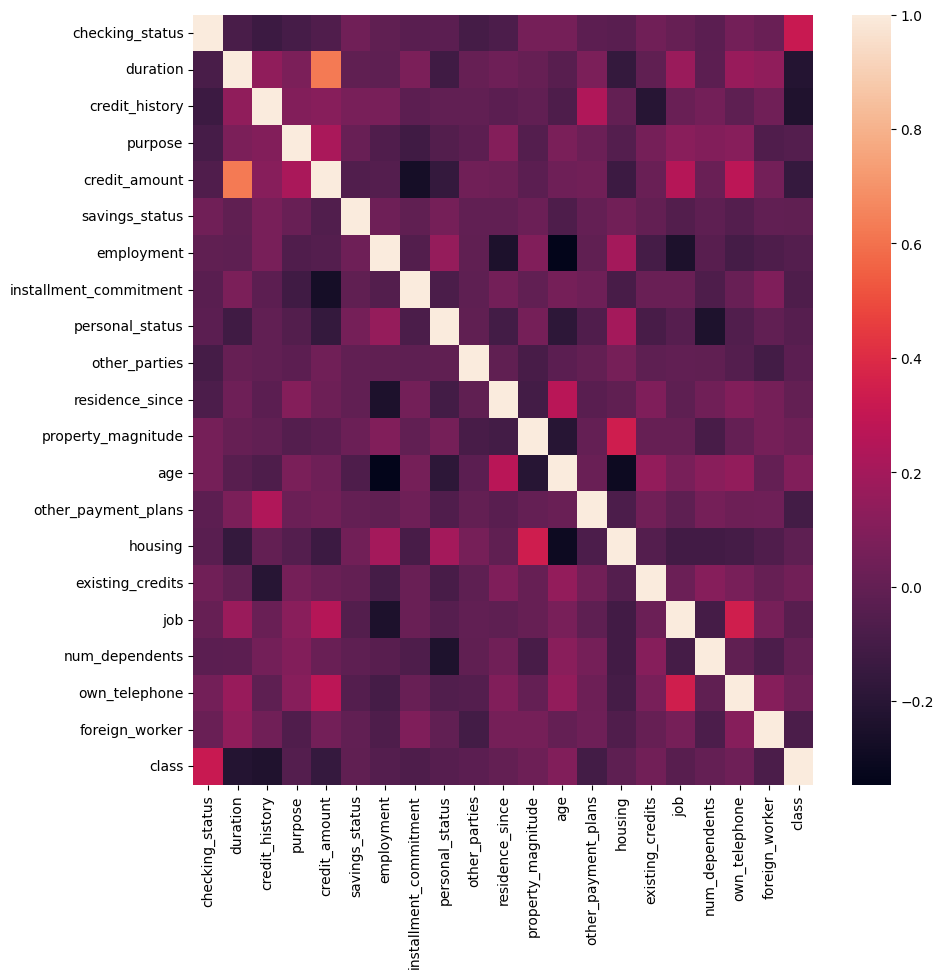

In [369]:
correlation = df.corr()

plt.figure(figsize=(10, 10))

sns.heatmap(correlation)

Importing models to assess which one is better.

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [371]:
columns = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

Defining X and Y for future models

In [372]:
X = df[columns]
Y = df['class']

Importing Train Test Split

In [373]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=1)

Using Logistic Regression

In [374]:
log = LogisticRegression()

In [ ]:
log.fit(X_train, Y_train)
ypred = model.predict(X_test)
print(ypred)

In [376]:
evaluation = f1_score(Y_test, ypred)
evaluation

0.8311111111111111

Using Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

In [ ]:
ypred_tree = tree.predict(X_test)
print(ypred_tree)

In [385]:
evaluation_tree = f1_score(Y_test, ypred_tree)
evaluation_tree

0.808411214953271

Using Random Forest Classifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

In [ ]:
ypred_forest = forest.predict(X_test)
print(ypred_forest)

In [384]:
evaluation_forest = f1_score(Y_test, ypred_forest)
evaluation_forest

0.8366013071895425